In [ ]:
# ============================================================
# FIX ENVIRONMENT ISSUE (run this first!)
# ============================================================
!pip install -q --upgrade pandas==2.2.2 tensorflow==2.16.1 seaborn matplotlib scikit-learn
!pip uninstall -y keras -q  # Prevents TensorFlow-Keras namespace conflicts
import os
os.kill(os.getpid(), 9)  # Restart runtime to apply changes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 77.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 70.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 77.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.6 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


✅ Model loaded successfully!
📏 Model expects input size: (32, 32)
📄 CSV loaded: (12630, 8)
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png
✅ Loaded 12630 test images.
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.0497 - loss: 10.6272
📊 Test Accuracy: 5.08%
📉 Test Loss: 10.5870
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step


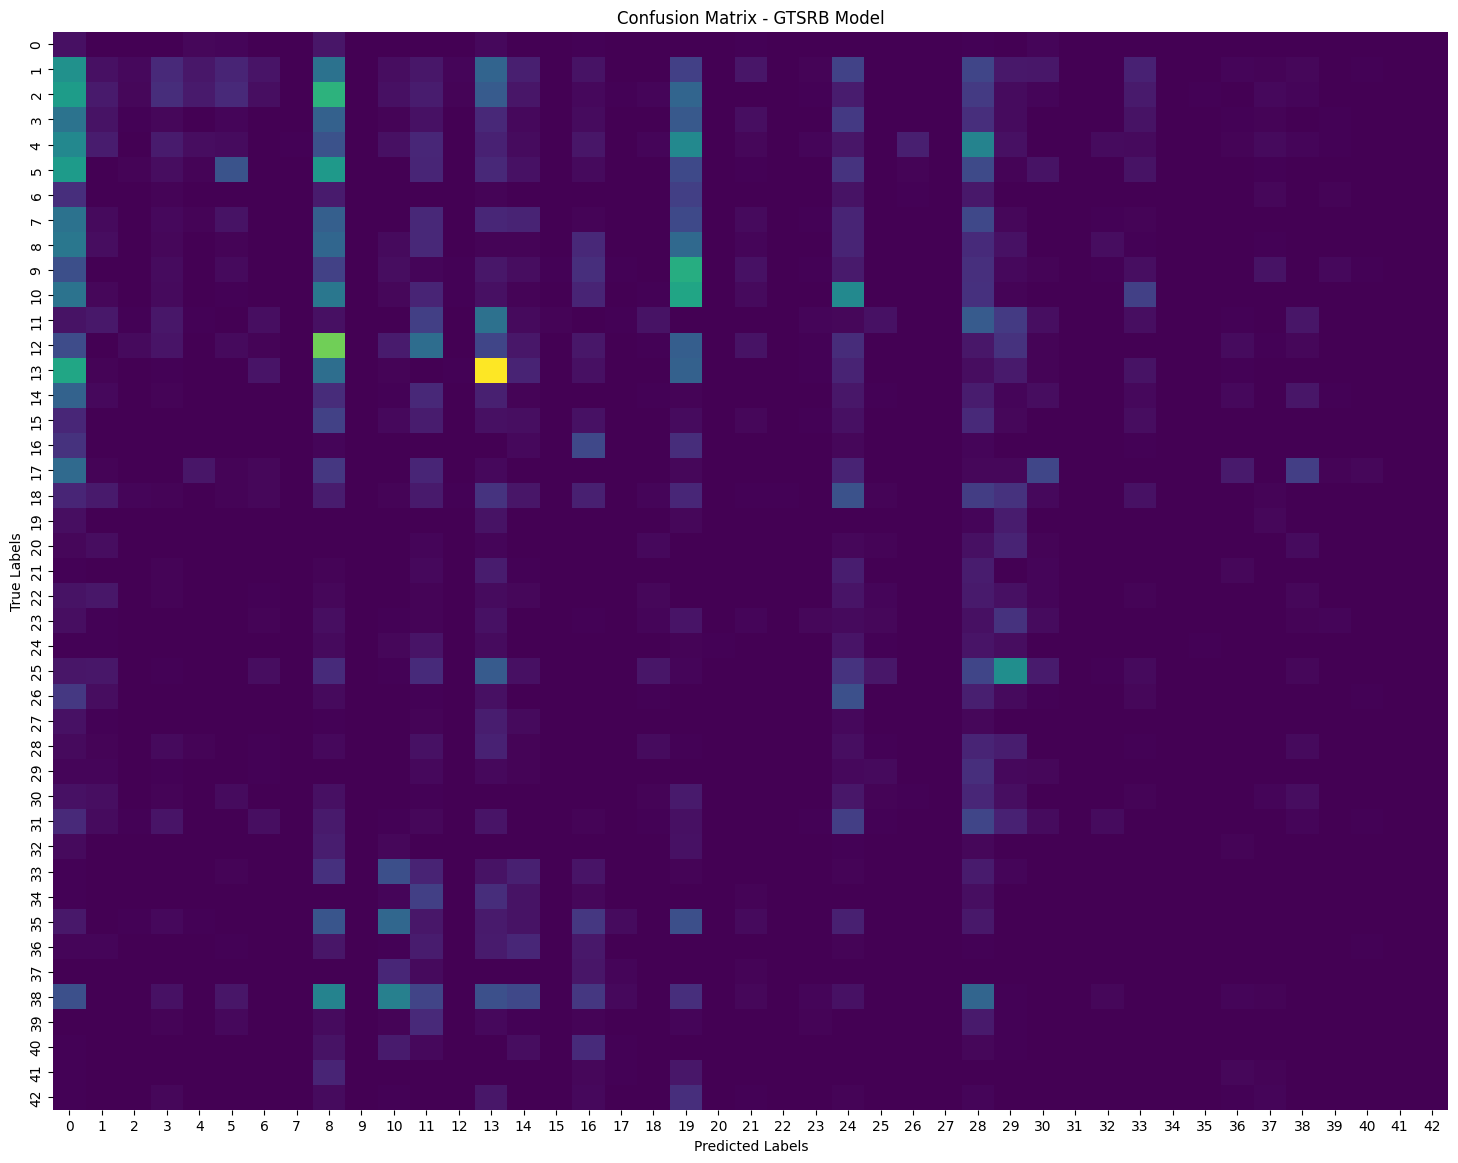

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.18      0.01        60
           1       0.05      0.02      0.02       720
           2       0.12      0.01      0.01       750
           3       0.02      0.01      0.01       450
           4       0.11      0.01      0.02       660
           5       0.31      0.10      0.16       630
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00       450
           8       0.05      0.19      0.08       450
           9       0.00      0.00      0.00       480
          10       0.01      0.01      0.01       660
          11       0.07      0.11      0.08       420
          12       0.04      0.00      0.00       690
          13       0.22      0.36      0.27       720
          14       0.01      0.01      0.01       270
          15       0.14      0.00      0.01       210
          16       0.12      0.37      0.19       150
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


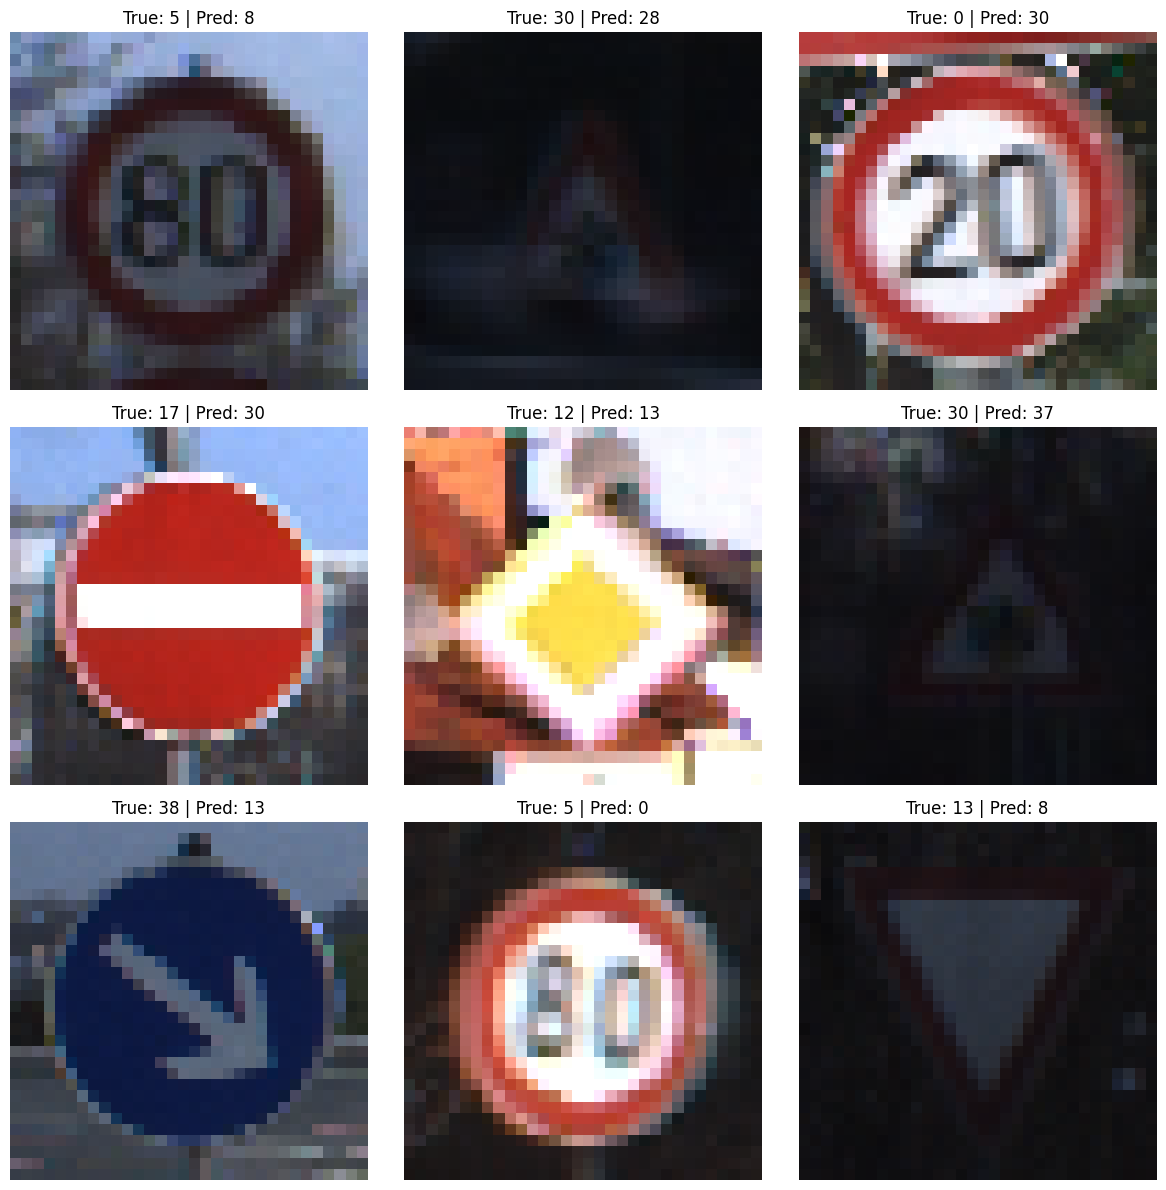

In [8]:
# ============================================================
# STEP 1: Imports
# ============================================================
import keras
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# ============================================================
# STEP 2: Paths
# ============================================================
model_path = "/kaggle/input/gtsrb-1/tensorflow2/default/1/gtsrb.h5"
base_dir = "/kaggle/input/gtsrb-german-traffic-sign"
csv_path = os.path.join(base_dir, "Test.csv")

# ============================================================
# STEP 3: Load Model
# ============================================================
model = keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# ✅ Fix metrics mismatch between TensorFlow Keras and Keras 3
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Detect input shape dynamically
input_shape = model.input_shape[1:3]
print(f"📏 Model expects input size: {input_shape}")

# ============================================================
# STEP 4: Load CSV and Prepare Data
# ============================================================
df = pd.read_csv(csv_path)
print("📄 CSV loaded:", df.shape)
print(df.head())

X_test, y_test = [], []
for i, row in df.iterrows():
    img_path = os.path.join(base_dir, row['Path'])
    img = image.load_img(img_path, target_size=input_shape)
    img_array = image.img_to_array(img)/255.0
    X_test.append(img_array)
    y_test.append(row['ClassId'])

X_test = np.array(X_test)
y_test = np.array(y_test)
y_test_cat = to_categorical(y_test, num_classes=model.output_shape[-1])

print(f"✅ Loaded {len(X_test)} test images.")

# ============================================================
# STEP 5: Evaluate Model
# ============================================================
loss, acc = model.evaluate(X_test, y_test_cat, verbose=1)
print(f"📊 Test Accuracy: {acc*100:.2f}%")
print(f"📉 Test Loss: {loss:.4f}")

# ============================================================
# STEP 6: Predictions
# ============================================================
y_pred = np.argmax(model.predict(X_test), axis=1)

# ============================================================
# STEP 7: Confusion Matrix
# ============================================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(18,14))
sns.heatmap(cm, cmap="viridis", cbar=False)
plt.title("Confusion Matrix - GTSRB Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ============================================================
# STEP 8: Classification Report
# ============================================================
print("📄 Classification Report:")
print(classification_report(y_test, y_pred))

# ============================================================
# STEP 9: Random Predictions Visualization
# ============================================================
plt.figure(figsize=(12,12))
for i in range(9):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_test[idx]} | Pred: {y_pred[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


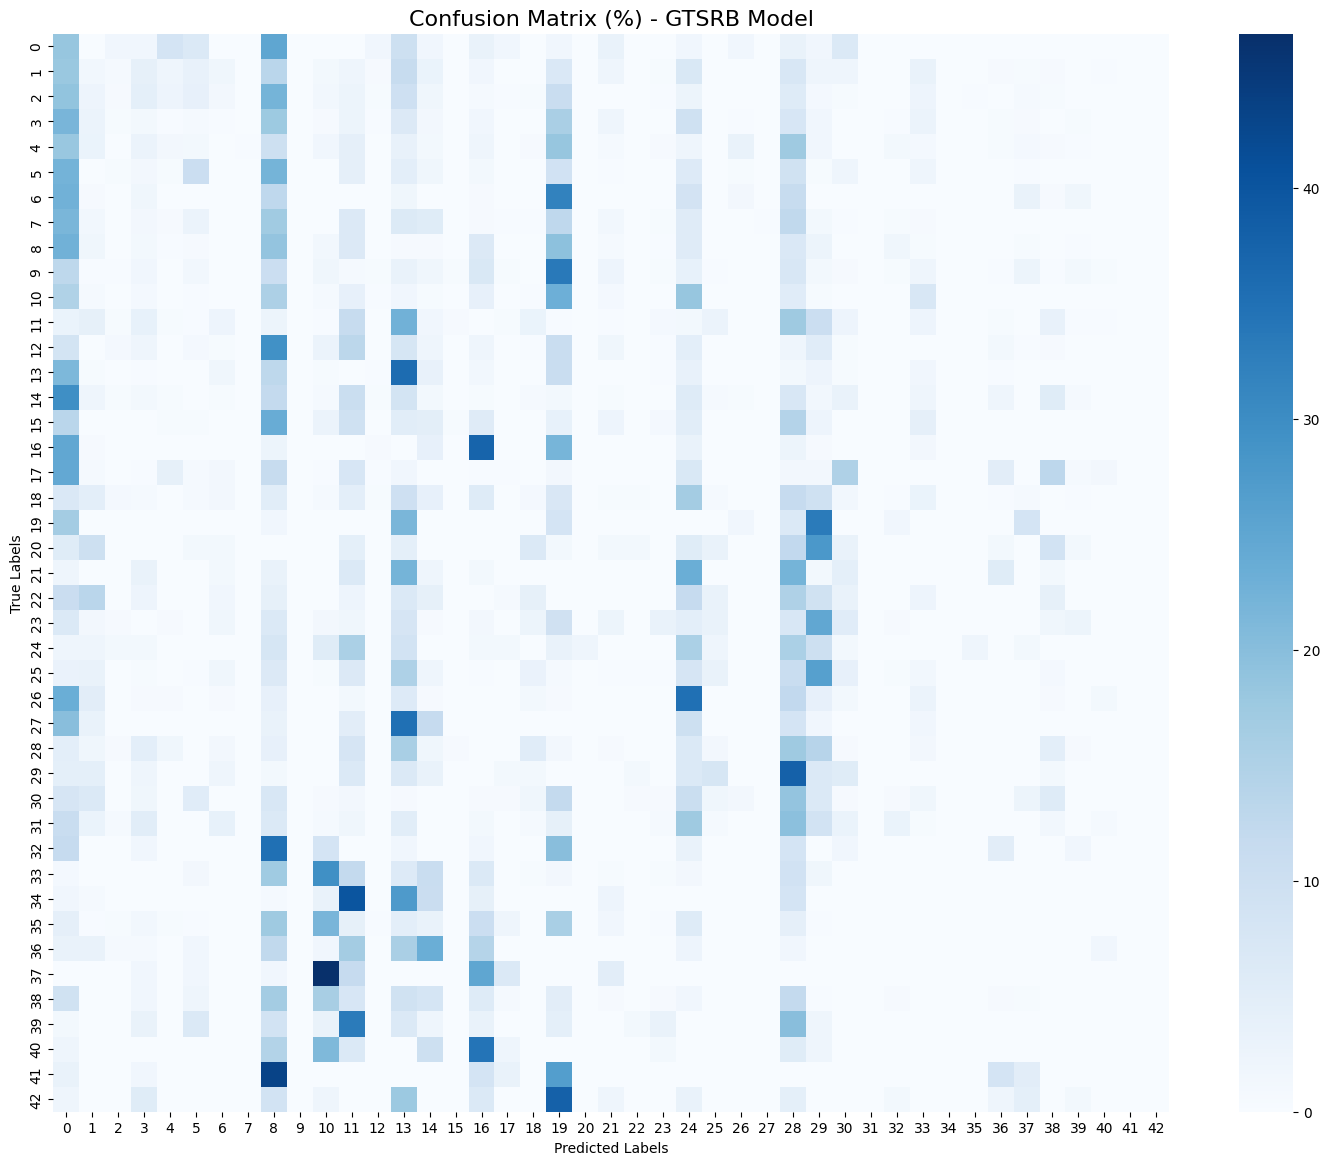

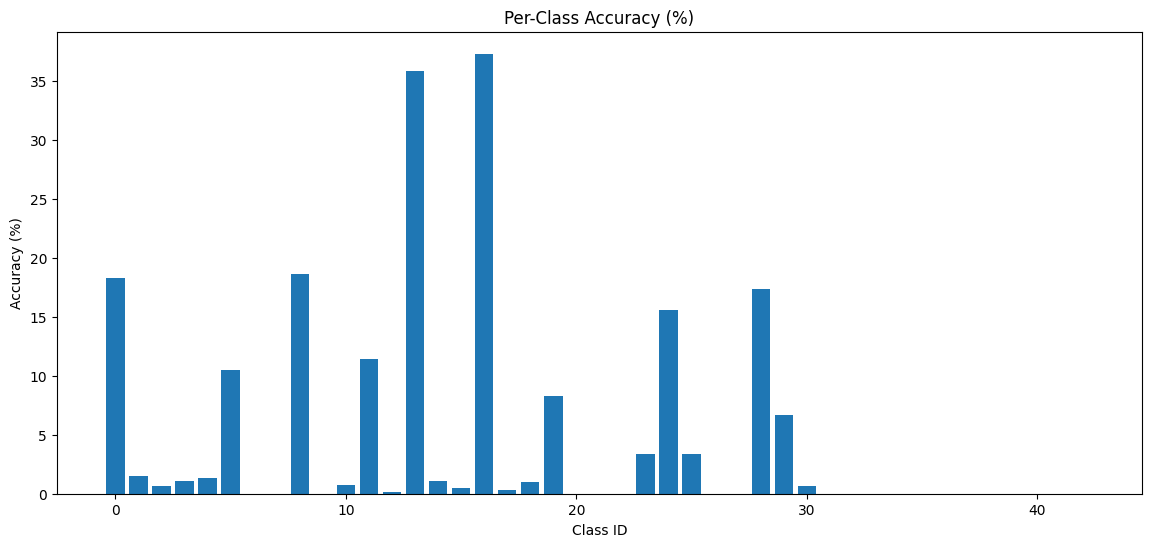

❌ Found 11989 misclassified images


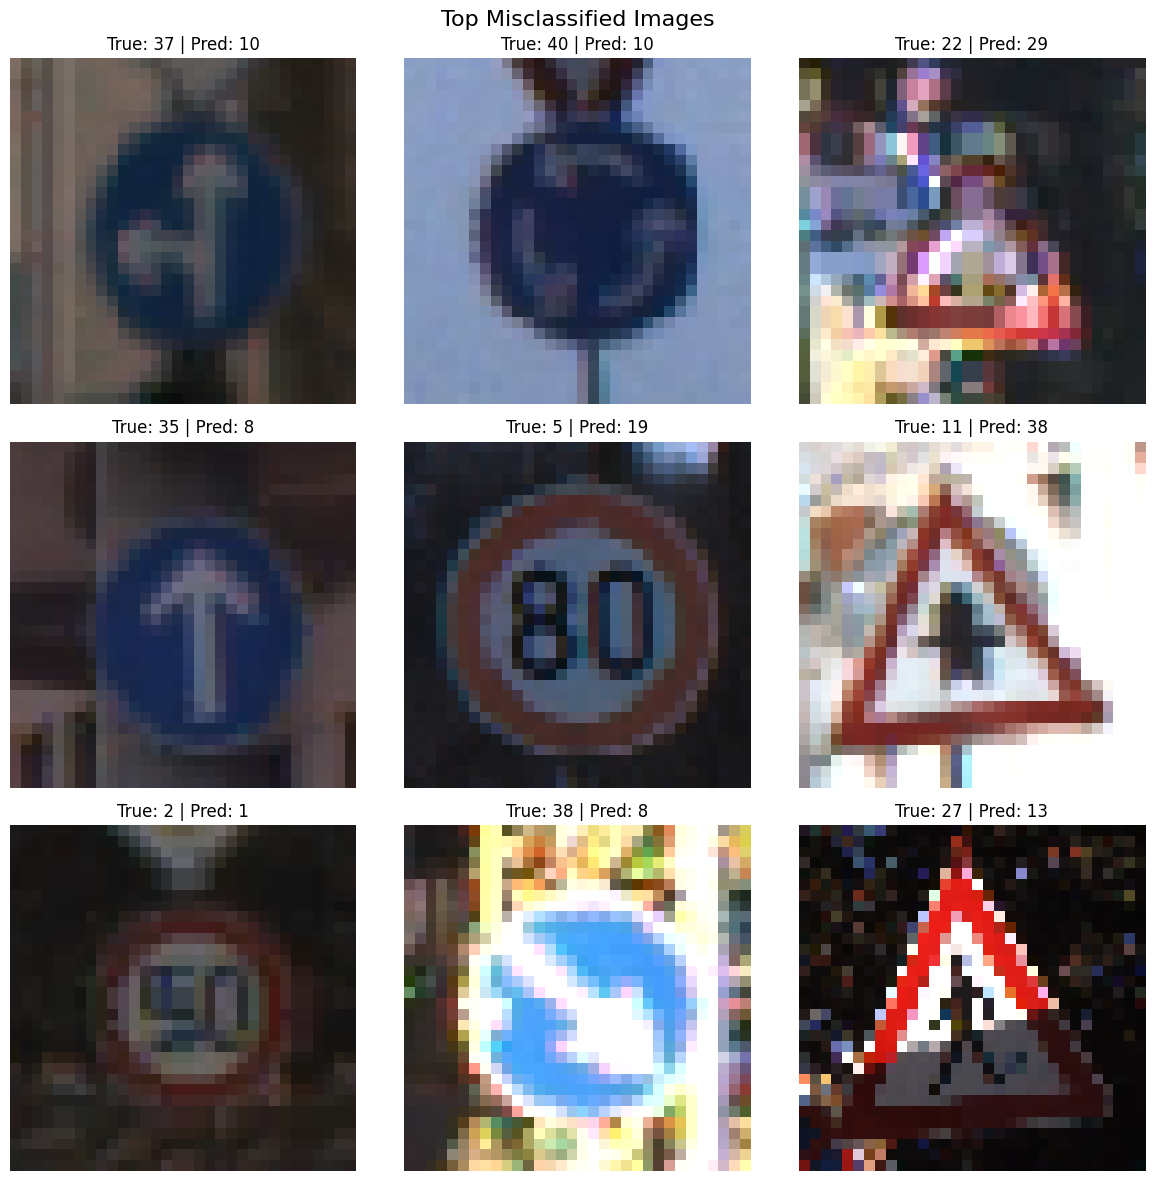

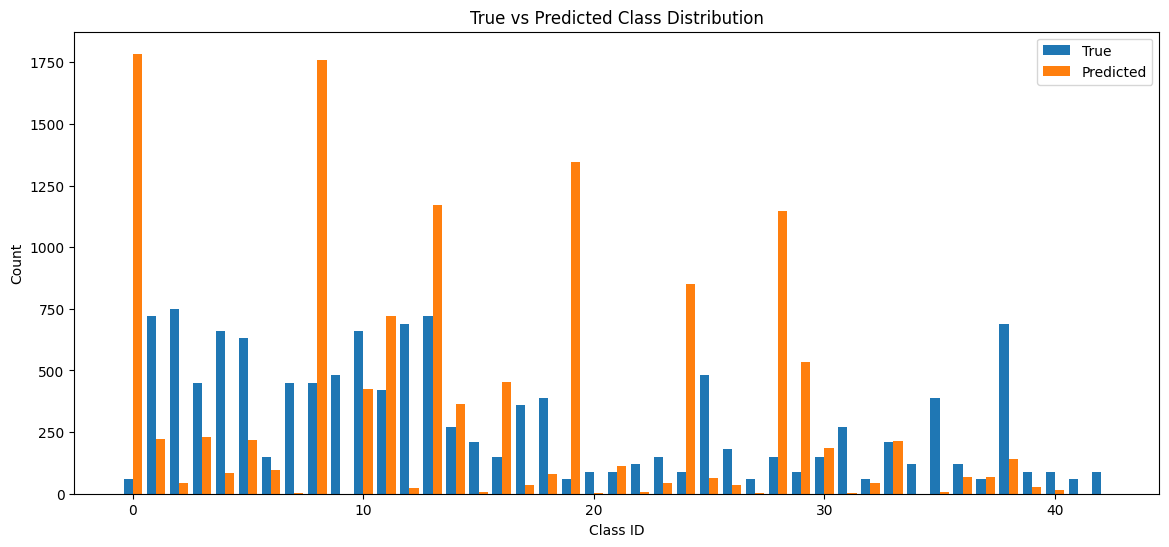

⚠️ Skipping ROC curves (too many classes).
✅ All visualizations generated successfully!


In [9]:
# ============================================================
# STEP 10: Additional Performance & Visualization Graphs
# ============================================================
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Reuse existing variables: X_test, y_test, y_pred, y_test_cat, model

# ============================================================
# 1️⃣ Confusion Matrix (Improved with percentages)
# ============================================================
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(18,14))
sns.heatmap(cm_percent, cmap="Blues", cbar=True)
plt.title("Confusion Matrix (%) - GTSRB Model", fontsize=16)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ============================================================
# 2️⃣ Per-Class Accuracy Bar Plot
# ============================================================
per_class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(14,6))
plt.bar(range(len(per_class_acc)), per_class_acc * 100)
plt.title("Per-Class Accuracy (%)")
plt.xlabel("Class ID")
plt.ylabel("Accuracy (%)")
plt.show()

# ============================================================
# 3️⃣ Top Misclassified Examples
# ============================================================
errors = np.where(y_pred != y_test)[0]
print(f"❌ Found {len(errors)} misclassified images")

plt.figure(figsize=(12,12))
for i, idx in enumerate(np.random.choice(errors, size=9, replace=False)):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_test[idx]} | Pred: {y_pred[idx]}")
    plt.axis("off")
plt.suptitle("Top Misclassified Images", fontsize=16)
plt.tight_layout()
plt.show()

# ============================================================
# 4️⃣ Class Distribution of True vs Predicted
# ============================================================
plt.figure(figsize=(14,6))
plt.hist([y_test, y_pred], bins=np.arange(len(np.unique(y_test)) + 1)-0.5, label=['True', 'Predicted'])
plt.legend()
plt.title("True vs Predicted Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.show()

# ============================================================
# 5️⃣ ROC Curve for Selected Classes (if num_classes < 20)
# ============================================================
num_classes = y_test_cat.shape[1]
if num_classes <= 20:
    y_score = model.predict(X_test)
    plt.figure(figsize=(10,8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC={roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title("ROC Curves (per class)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.show()
else:
    print("⚠️ Skipping ROC curves (too many classes).")

# ============================================================
# 6️⃣ Precision-Recall Curve for first few classes
# ============================================================
if num_classes <= 20:
    plt.figure(figsize=(10,8))
    for i in range(min(10, num_classes)):
        precision, recall, _ = precision_recall_curve(y_test_cat[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f"Class {i}")
    plt.title("Precision-Recall Curves (sample of classes)")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(fontsize=8)
    plt.show()

print("✅ All visualizations generated successfully!")


395/395 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step


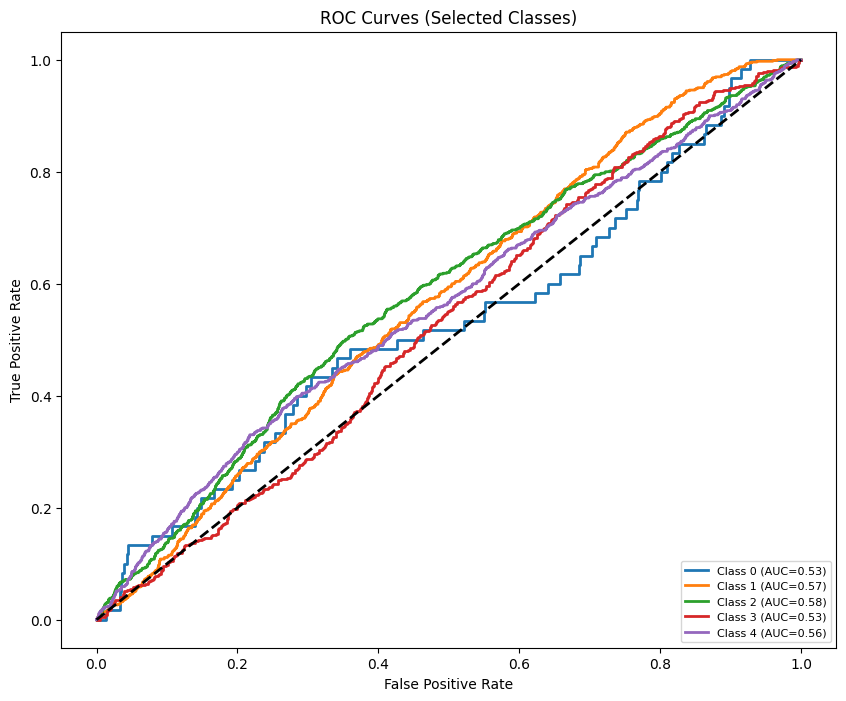

In [10]:
# ============================================================
# STEP 11: ROC Curves for Selected Classes (Top 5)
# ============================================================
from sklearn.metrics import roc_curve, auc

# Compute prediction scores again if needed
y_score = model.predict(X_test)
num_classes = y_test_cat.shape[1]

# Pick 5 random or important classes
selected_classes = [0, 1, 2, 3, 4]  # change to any 5 class IDs you want

plt.figure(figsize=(10,8))
for i in selected_classes:
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curves (Selected Classes)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize=8)
plt.show()


395/395 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step


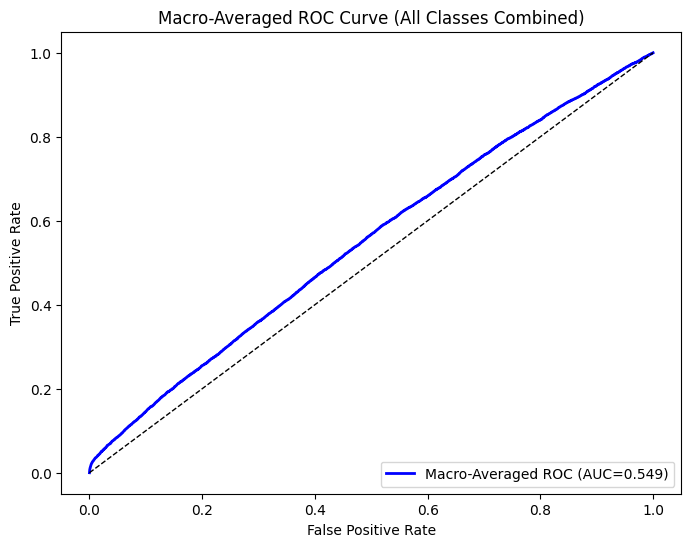

In [11]:
# ============================================================
# STEP 12: Macro-Averaged ROC Curve
# ============================================================
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test_cat.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Macro-Averaged ROC (AUC={roc_auc:.3f})")
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title("Macro-Averaged ROC Curve (All Classes Combined)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
